:::{.callout-note}
Last update: 3 Jan 2024  
This page is a test post. The Jupyter notebook is a rough draft. This post is for testing only. Grammar and spelling checks have not been done.  
:::

# Chua’s circuit

ToDo:  

- fix folder and make LTSpice file  
- fix this write up  
- get research materials  

Sections  

- Abstract  
- Intro  
  - what is a [Chua's circuit](https://en.wikipedia.org/wiki/Chua's_circuit)?  

[Leon O. Chua](https://en.wikipedia.org/wiki/Leon_O._Chua)  

[Leon O. Chua](https://people.eecs.berkeley.edu/~chua/)  

[Memristor](https://en.wikipedia.org/wiki/Memristor)

get VI curve from /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/Chua's circuit/Chua NL element part 1.asc

get the data file and do a curve fit. 


In [1]:
import numpy as np
from sympy import *
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

## Circuit with elements only

This schematic is chua1 at /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/Chua's circuit/Chua1.asc

![schematic](Chua's-circuit.png)

~~~
* Chua1.asc
L1 1 0 18e-3
C1 1 0 100e-9
C2 2 0 10e-9
R1 1 2 1770
R2 2 0 1
~~~

$I_{L1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{1}} = 0$  
$v_{2} \left(C_{2} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$  
$- I_{L1} L_{1} s + v_{1} = 0$  


In [50]:
R1, R2, L1, C2, C1, v3, V1, I_L1, I_V1, v2, s, v1 = symbols(' R1  R2  L1  C2  C1  v3  V1  I_L1  I_V1  v2  s  v1 ')
A = Matrix([[C1*s + 1/R1, -1/R1, 0, 0, 1], [-1/R1, C2*s + 1/R2 + 1/R1, -1/R2, 0, 0], [0, -1/R2, 1/R2, 1, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, -L1*s]])
X = Matrix( [v1, v2, v3, I_V1, I_L1] )
Z = Matrix( [0, 0, 0, V1, 0] )

equ = Eq(A*X,Z)

In [51]:
equ

⎡           ⎛       1 ⎞   v₂  ⎤       
⎢ I_L1 + v₁⋅⎜C₁⋅s + ──⎟ - ──  ⎥       
⎢           ⎝       R₁⎠   R₁  ⎥       
⎢                             ⎥   ⎡0 ⎤
⎢   ⎛       1    1 ⎞   v₃   v₁⎥   ⎢  ⎥
⎢v₂⋅⎜C₂⋅s + ── + ──⎟ - ── - ──⎥   ⎢0 ⎥
⎢   ⎝       R₂   R₁⎠   R₂   R₁⎥   ⎢  ⎥
⎢                             ⎥ = ⎢0 ⎥
⎢              v₂   v₃        ⎥   ⎢  ⎥
⎢       I_V1 - ── + ──        ⎥   ⎢V₁⎥
⎢              R₂   R₂        ⎥   ⎢  ⎥
⎢                             ⎥   ⎣0 ⎦
⎢             v₃              ⎥       
⎢                             ⎥       
⎣       -I_L1⋅L₁⋅s + v₁       ⎦       

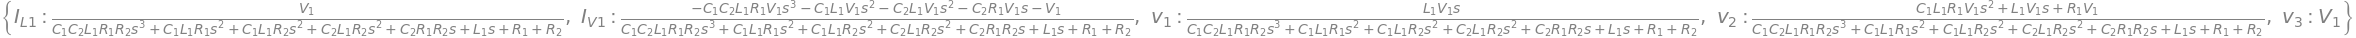

In [52]:
solve(equ,X)

In [53]:
component_value = {
V1:0.0000e+00,
L1:1.8000e-02,
C1:1.0000e-07,
C2:1.0000e-08,
R2:1.0000e+00
}

In [54]:
equ1 = equ.subs(component_value)
equ1

⎡            ⎛           1 ⎞   v₂  ⎤      
⎢  I_L1 + v₁⋅⎜1.0e-7⋅s + ──⎟ - ──  ⎥      
⎢            ⎝           R₁⎠   R₁  ⎥   ⎡0⎤
⎢                                  ⎥   ⎢ ⎥
⎢   ⎛                 1 ⎞        v₁⎥   ⎢0⎥
⎢v₂⋅⎜1.0e-8⋅s + 1.0 + ──⎟ - v₃ - ──⎥   ⎢ ⎥
⎢   ⎝                 R₁⎠        R₁⎥ = ⎢0⎥
⎢                                  ⎥   ⎢ ⎥
⎢        I_V1 - v₂ + 1.0⋅v₃        ⎥   ⎢0⎥
⎢                                  ⎥   ⎢ ⎥
⎢                v₃                ⎥   ⎣0⎦
⎢                                  ⎥      
⎣        -0.018⋅I_L1⋅s + v₁        ⎦      

In [55]:
U = solve(equ1,X)
U

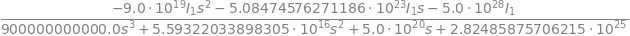

In [49]:
U[v2]

In [17]:
s = symbols('s')
t = symbols('t',positive=True)  # t > 0

In [48]:
inverse_laplace_transform(U[v2], s, t)

PolynomialError: RisingFactorial(_t + 1, 1.0) contains an element of the set of generators.

In [ ]:
stop

In [5]:
# declare the following symbols
v2, R1, I_L1, C1, v1, C2, s, R2 = symbols('v2 R1 I_L1 C1 v1 C2 s R2')

# use the equations generated by nodal analysis
equ_p1 = Matrix(
    [[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
    [Eq(v2*(C2*s + 1/R2 + 1/R1) - v1/R1, 0)]])
equ_p1

⎡           ⎛       1 ⎞   v₂    ⎤
⎢-I_L1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0⎥
⎢           ⎝       R₁⎠   R₁    ⎥
⎢                               ⎥
⎢    ⎛       1    1 ⎞   v₁      ⎥
⎢ v₂⋅⎜C₂⋅s + ── + ──⎟ - ── = 0  ⎥
⎣    ⎝       R₂   R₁⎠   R₁      ⎦

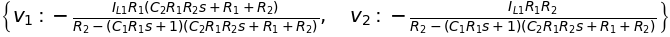

In [6]:
# find symbolic solution
u = solve(equ_p1,[v1, v2, I_L1])
u

## Circuit with voltage source

![schematic](sch_Chua’s_circuit_w_source.png)

https://easyeda.com/editor#mode=sim,id=|6b1460bfe8ec4872b7d7fd3038f38331|82658727399e487c94ebe177746e0ba0|ea67be55cc5c49f288edfa4ed837b1f0|8ea3b89798114238a453a1c678008c07



~~~
V1 3 0 1
L1 0 1 8.5e-3
C1 0 1 47e-9
C2 0 2 4.7e-9
R1 1 2 1.6e3
R2 3 2 1


str(equ)
'Matrix(
[[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
[Eq(v2*(C2*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
[Eq(I_V1 - v2/R2 + v3/R2, 0)],
[Eq(v3, V1)],
[Eq(-I_L1*L1*s - v1, 0)]]

)'
str(equ.free_symbols)
'{I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2}'
str(X)
'[v1, v2, v3, I_V1, I_L1]'




str(equ.free_symbols)
'{I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2}'
str(X)
'[v1, v2, v3, I_L1, I_V1]'

~~~

In [6]:
# declare the following symbols
I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2 = symbols('I_V1 V1 s v2 R1 I_L1 v3 v1 C1 L1 C2 R2')

# use the equations generated by nodal analysis
equ_p1 = Matrix(
    [[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
    [Eq(v2*(C2*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
    [Eq(I_V1 - v2/R2 + v3/R2, 0)],
    [Eq(v3, V1)],
    [Eq(-I_L1*L1*s - v1, 0)]])
equ_p1

⎡            ⎛       1 ⎞   v₂     ⎤
⎢ -I_L1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0 ⎥
⎢            ⎝       R₁⎠   R₁     ⎥
⎢                                 ⎥
⎢   ⎛       1    1 ⎞   v₃   v₁    ⎥
⎢v₂⋅⎜C₂⋅s + ── + ──⎟ - ── - ── = 0⎥
⎢   ⎝       R₂   R₁⎠   R₂   R₁    ⎥
⎢                                 ⎥
⎢              v₂   v₃            ⎥
⎢       I_V1 - ── + ── = 0        ⎥
⎢              R₂   R₂            ⎥
⎢                                 ⎥
⎢             v₃ = V₁             ⎥
⎢                                 ⎥
⎣       -I_L1⋅L₁⋅s - v₁ = 0       ⎦

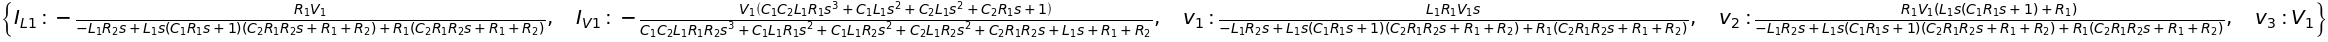

In [7]:
# find symbolic solution
u = solve(equ_p1,[v1, v2, v3, I_L1, I_V1])
u